In [170]:
import pandas as pd
import numpy as np
import os
import json

In [171]:
accuracies = {}
with open('digit_analysis/acc_log.txt') as acc_log:
    for line in acc_log:
        if "clean" in line or "epoch" in line:
            data = line.strip().split("/")[-1].split(": ", 1)
            name = data[0]
            acc = json.loads(data[1][1:-1].replace("'",'"'))
            accuracies[name] = acc['test_acc']
        else:
            data = line.strip().split("/")[-1].split(": ", 1)
            name = data[0][17:-11].replace("_",".")
            acc = json.loads(data[1][1:-1].replace("'",'"'))
            accuracies[name] = acc['test_acc']

In [172]:
accuracies['Win32.Unknown_SpectreMeltdown.zip'] = accuracies['Win32.Unknown.SpectreMeltdown.zip']

In [173]:
data = {"pre-corr":[], "post-corr":[], "accuracy": []}
index = []
for filename in os.listdir('digit_analysis'):
    if filename == 'clean_dist.csv':
        continue
    if filename == 'epoch_dist.csv':
        continue
    if filename[-4:] == '.csv':
        dist = pd.read_csv('digit_analysis/' + filename).drop('Unnamed: 0', axis=1).drop(0, axis=0)
        dist_corr = dist.corr()
        data["pre-corr"].append(dist_corr["expect"].loc["pre"])
        data["post-corr"].append(dist_corr["expect"].loc["post"])
        index.append(filename[:-4])

for item in index:
    data["accuracy"].append(accuracies[item[9:-2]])

In [174]:
mal_acc_data = pd.DataFrame(data=data, index=index)
mal_acc_data

,pre-corr,post-corr,accuracy
densenet_Win32.XAgent.zip_0,0.985133,0.996754,0.793258
densenet_Win32.Turla.v1.zip_0,0.985133,0.995856,0.796891
densenet_Win32.Caphaw.Shylock.zip_0,0.985133,0.997931,0.760174
densenet_Win32.Emotet.zip_0,0.985133,0.991603,0.832898
densenet_Win32.Lephic.zip_0,0.985133,0.992967,0.835519
densenet_Win32.Boaxxe.BB.zip_0,0.985133,0.995247,0.807181
densenet_Win32.APT28.SekoiaRootkit.zip_0,0.985133,0.981286,0.840051
densenet_Win32.Cutwail.zip_0,0.985133,0.997570,0.723172
densenet_Win32.Cridex.zip_0,0.985133,0.994416,0.822697
densenet_Win32.APT32.WindShield.zip_0,0.985133,0.997321,0.792753


In [175]:
import matplotlib.pyplot as plt

In [176]:
clean_dist = pd.read_csv('digit_analysis/clean_dist.csv').drop(0, axis=0)
num_weights = clean_dist['densenet_cifar10_clean_F_21_model.pt'].sum()
expected = pd.Series(np.log10([1 + 1/x for x in range(1,10)]) * num_weights, index=range(1, 10))
clean_corr_data = clean_dist.corrwith(expected)
clean_acc_data = pd.Series(data=[accuracies[name] for name in clean_corr_data.index], index=clean_corr_data.index)

In [177]:
epoch_dist = pd.read_csv('digit_analysis/epoch_dist.csv').drop(0, axis=0)
num_weights = epoch_dist['densenet_cifar10_epoch_5_1_model.pt'].sum()
expected = pd.Series(np.log10([1 + 1/x for x in range(1,10)]) * num_weights, index=range(1, 10))
epoch_corr_data = epoch_dist.corrwith(expected)
epoch_acc_data = pd.Series(data=[accuracies[name] for name in epoch_corr_data.index], index=epoch_corr_data.index)

In [178]:
epoch_corr_data

densenet_cifar10_epoch_85_1_model.pt     0.977125
densenet_cifar10_epoch_120_1_model.pt    0.989105
densenet_cifar10_epoch_70_1_model.pt     0.972077
densenet_cifar10_epoch_110_1_model.pt    0.986026
densenet_cifar10_epoch_55_1_model.pt     0.969565
densenet_cifar10_epoch_115_1_model.pt    0.987537
densenet_cifar10_epoch_45_1_model.pt     0.970992
densenet_cifar10_epoch_50_1_model.pt     0.970036
densenet_cifar10_epoch_15_1_model.pt     0.990845
densenet_cifar10_epoch_105_1_model.pt    0.984541
densenet_cifar10_epoch_100_1_model.pt    0.982866
densenet_cifar10_epoch_10_1_model.pt     0.994571
densenet_cifar10_epoch_65_1_model.pt     0.970784
densenet_cifar10_epoch_40_1_model.pt     0.972902
densenet_cifar10_epoch_25_1_model.pt     0.982277
densenet_cifar10_epoch_20_1_model.pt     0.986241
densenet_cifar10_epoch_30_1_model.pt     0.978313
densenet_cifar10_epoch_95_1_model.pt     0.981222
densenet_cifar10_epoch_75_1_model.pt     0.973617
densenet_cifar10_epoch_60_1_model.pt     0.970090


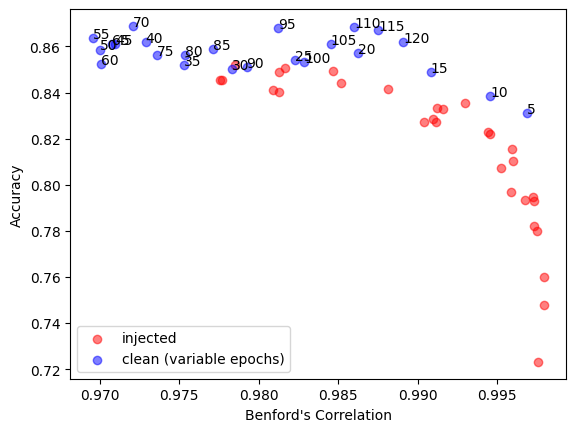

In [179]:
plt.scatter(x=mal_acc_data['post-corr'], y=mal_acc_data['accuracy'], c="#FF0000", alpha=0.5, label="injected")
plt.scatter(x=epoch_corr_data, y=epoch_acc_data, c="#0000FF", alpha=0.5, label="clean (variable epochs)")
for label in epoch_corr_data.index:
    plt.annotate(label.split('_')[3],(epoch_corr_data.loc[label], epoch_acc_data.loc[label]))
plt.xlabel("Benford's Correlation")
plt.ylabel("Accuracy")
plt.legend()

In [180]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [208]:
x1 = mal_acc_data[['post-corr','accuracy']].to_numpy()
y1 = np.ones(x1.shape[0])
x2 = np.vstack((epoch_corr_data,epoch_acc_data)).T
y2 = np.zeros(x2.shape[0])
X = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
X[:, 1] = np.power(X[:, 1], 10)

In [209]:
clf = svm.SVC(kernel='linear', C=2000)
clf.fit(X, y)
clf.score(X, y)

0.8888888888888888

In [210]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.01, x.max() + 0.01
    y_min, y_max = y.min() - 0.01, y.max() + 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

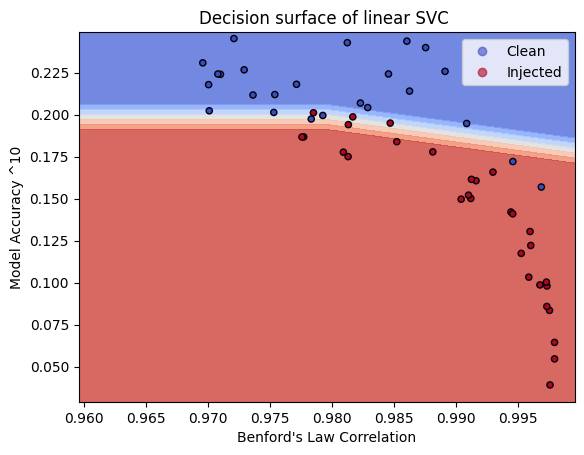

In [223]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
ax.set_ylabel('Model Accuracy ^10')
ax.set_xlabel("Benford's Law Correlation")
ax.set_title(title)
ax.legend(handles, ['Clean', 'Injected'], loc='best')
plt.show()